# Amazon Rainforest Projections

#Introduction to Packages

We are now going to look at analysing data from NetCDF files, one of the main file types that store climate data, whether this be output from general circulation models or observations.

We need to download some packages to be able to use these file types, and to plot them nicely. Packages contain a number of functions that the R community have created and are generally maintained by the people who made them. The 'ncdf4' package allows R to read and create NetCDF files. The 'maps' package contains lots of outlines of countries and states to allow us to create nice plots.

Packages need to be installed first in R.

In [2]:
install.packages('ncdf4')
install.packages('maps')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



On your local machine, once they have been installed, the lines above do not have to be run again unless you download a new version of R. However, in every 'instance' of R (i.e. when you start from a blank workspace), you will need to load these libraries in like below. Here in this notebook however you will need to install the packages each time. The libraries are loaded in like so:

In [3]:
library('ncdf4')
library('maps')

You will not get any output from the above code unless there is an error. General practice would be to load the packages you need in your script at the top. Remember, the `install.packages()` functions only need to be used once and the `library()` ones every time you have a new instance of R.

# NetCDF Files

We now are set up to read in NetCDF files. In the example here we will analyse output from the UK Earth System Model (UKESM1) projected with SSP585, a scenario considered as an upper bound of plausible trajectories regarding the burning of fossil fuels for example (more information can be found online).

The file analysed here is a NetCDF specifically created for this workshop but similar files can be found online. It contains data on temperature, precipitation and the carbon stored in vegetation, across a region of South America, containing the Amazon rainforest.

To begin with we need to upload the UKESM1_ssp585_Amazon.nc file to the content folder as before and make a connection to the file using the `nc_open()` function. We can then see what is inside the file using the `print_nc()` function (which also acts as a good check everything is working as intended).



In [8]:
nc_file <- nc_open('UKESM1_ssp585_Amazon.nc')
print(nc_file)

[1] "sample_data"             "UKESM1_ssp585_Amazon.nc"

File UKESM1_ssp585_Amazon.nc (NC_FORMAT_NETCDF4):

     3 variables (excluding dimension variables):
        float tas[lon,lat,time]   (Contiguous storage)  
            units: K
            _FillValue: 1.00000003318135e+32
            long_name: Temperature
        float pr[lon,lat,time]   (Contiguous storage)  
            units: kg m-2 s-1
            _FillValue: 1.00000003318135e+32
            long_name: Precipitation
        float cVeg[lon,lat,time]   (Contiguous storage)  
            units: kg m-2
            _FillValue: 1.00000003318135e+32
            long_name: Carbon Mass in Vegetation

     3 dimensions:
        lon  Size:24 
            units: degrees_east
            long_name: lon
            axis: X
        lat  Size:24 
            units: degrees_north
            long_name: lat
            axis: Y
        time  Size:1032 
            units: year
            long_name: time
            axis: T

    3 global attributes:
        title: UKESM1 SSP585 Amazon
        insti

This printout tells you that there are 3 variables, 'Temperature', 'Precipitation' and 'Carbon Mass in Vegetation' known as 'tas', 'pr' and 'cVeg' alongside their units. These also have 3 dimensions: lon, lat and time, which are 24, 24 and 1032 long respectively. Some 'global attributes' at the bottom tell you more about the file.

Most NetCDF files will not be as clear as this! They will contain a lot of information that will be confusing, but trying to find the 'variables' and 'dimensions' sections will be most useful.

We are now going to pull out the 6 variables we need, the 3 data variables and the 3 dimensions using the `ncvar_get()` function:

In [9]:
temp <- ncvar_get(nc_file, 'tas')
precip <- ncvar_get(nc_file, 'pr')
cveg <- ncvar_get(nc_file, 'cVeg')

lon <- ncvar_get(nc_file, 'lon')
lat <- ncvar_get(nc_file, 'lat')
time <- ncvar_get(nc_file, 'time')

dim(temp)
dim(precip)
dim(cveg)

length(lon)
length(lat)
length(time)

[1]   24   24 1032

[1]   24   24 1032

[1]   24   24 1032

[1] 24

[1] 24

[1] 1032

Checking all the dimensions and lengths of these variables shows they are as expected. The 3 'data' variables can be thought of as cubes, with the first dimension being the longitude, the second is latitude and the third is time. Like we learned in the R basics we can pick out a specific value at a location:

In [10]:
temp[10,10,12] #picks out the temperature at the 10th lon, 10th lat and 12th time point (value currently is in Kelvin not Celcius)

[1] 301.5154

To see what location this is at we would have to look at what the 10th lon, lat and the 12th time point is:

In [11]:
lon[10]
lat[10]
time[12]

[1] -66.5625

[1] -8.125

[1] 2015.958

This tell us that it is at -66.5 lon (66.5 W) -8 lat (8 S) and near the end of 2015.

#Plotting and Maps

Like other worksheets we can plot the full time series at the location above, selecting all the time points by leaving a blank space for the 3rd dimension:

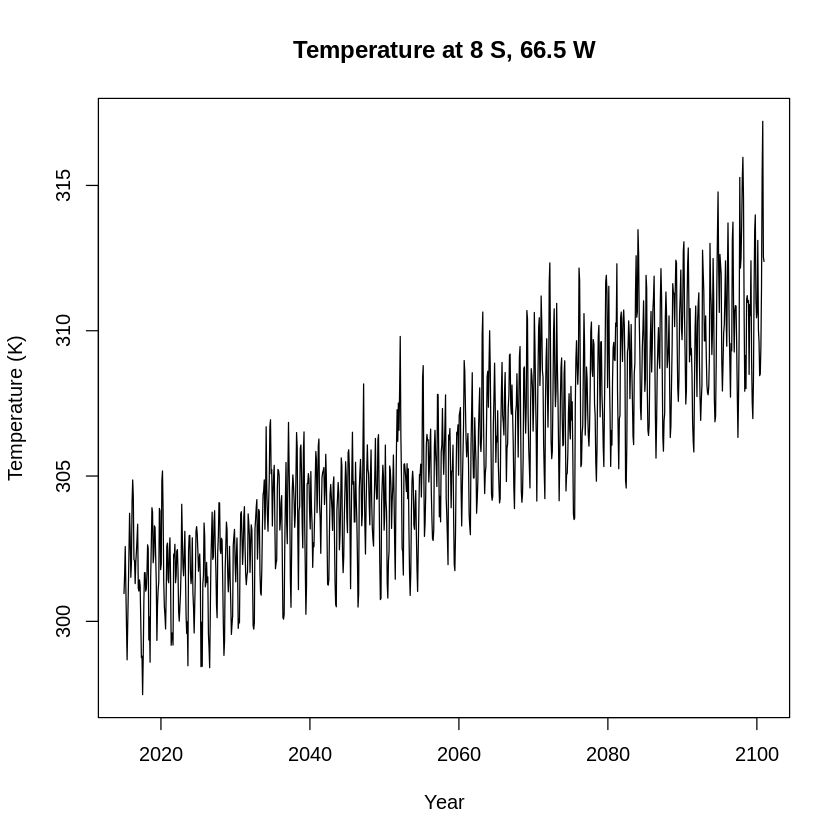

In [12]:
plot(time, temp[10,10,], type='l', main='Temperature at 8 S, 66.5 W', xlab='Year', ylab='Temperature (K)')

As you can see, the temperature at this location increases over the century. **Change the code above to look at precipitation at the same location.**

*Is there a clear trend for the precipitation for this location?*


*What are some other ways that we could display this information?*




We can also look at maps of these variables at a certain point in time using the `image()` function. Here we keep the lon and lat dimensions blank and select a time index. For simplicity we will look at the temperatures in January 2015 (time point 1). We can add a map on with the second line too (this is what the maps package we read in was used for).

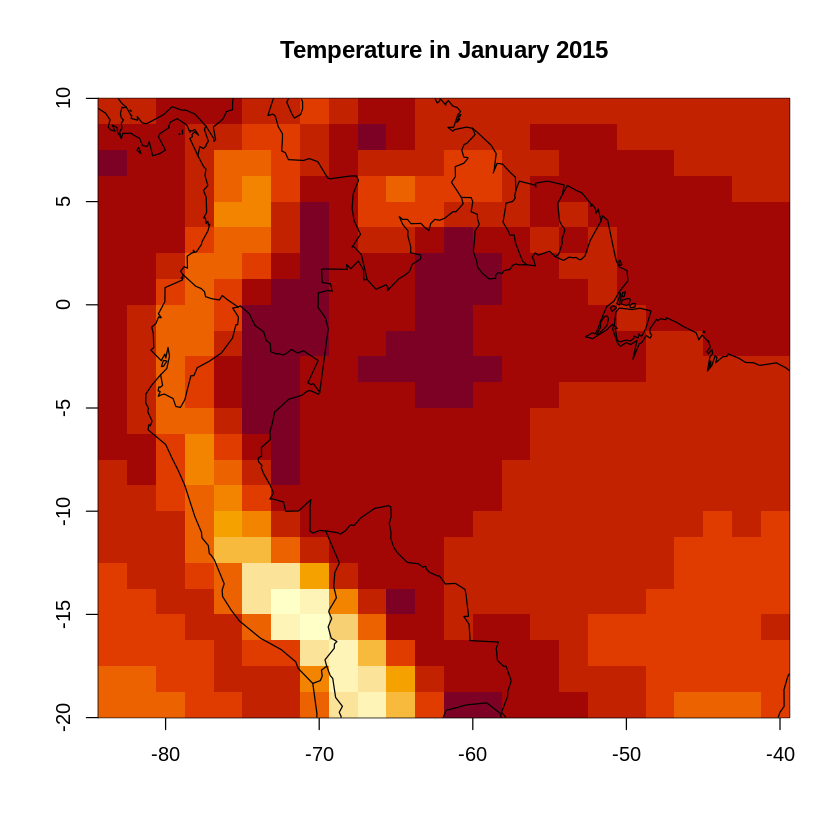

In [ ]:
image(lon, lat, temp[,,1], main='Temperature in January 2015', xlab='', ylab='')
map('world', add=T)

**Change the code block to look at carbon vegetation in the same month. What do you notice?**




The above plot shows darker colour for higher values but it is not very intuitive or useful in providing information. Let's first look at converting the units of both the temperature (Kelvin to Celsius) and precipitation (kg/m^2/s to mm/month) then we can make plots with colour scales on

In [1]:
temp_c <- temp-273.15 #converts kelvin to celsius
precip_mon <- precip*86400*30 #converts kg/m^2/s to mm/day and then assumes there are 30 days in a month

ERROR: Error in eval(expr, envir, enclos): object 'temp' not found


We can make R plot maps in different colours much like normal plots. However we have to specify a set of colours for it to use (rather than just one individual colour). One way to do this is with the `colorRampPalette()` function, which takes a number of colours as input and creates a function that allows you to specify the number of colours you want that go from the first colour to the last colour. For example:

In [ ]:
blueToRed <- colorRampPalette(c('blue','red')) #creates a function that will output colours from blue to red
blueToRed(20) #will output 20 colours with the first being blue and the 20th red

[1] "#0000FF" "#0D00F1" "#1A00E4" "#2800D6" "#3500C9" "#4300BB" "#5000AE"
 [8] "#5D00A1" "#6B0093" "#780086" "#860078" "#93006B" "#A1005D" "#AE0050"
[15] "#BB0043" "#C90035" "#D60028" "#E4001A" "#F1000D" "#FF0000"

These colours are in the hexadecimal format, you don't need to understand them fully but R will use them as a colour palette for plots (much like the automatically used yellow to red in the map above).

If we are to make a map with these colours, we first need to tell R what range to plot those colours over, so we have more control when we make a colour bar. We will need to see what range we are going to plot colours over:

In [ ]:
range(temp_c[,,1])

[1]  6.990869 30.739404

The above shows us that temperatures in the first month range from 6.99 to 30.74 degrees C. With this information we can make a map that uses our new colours:

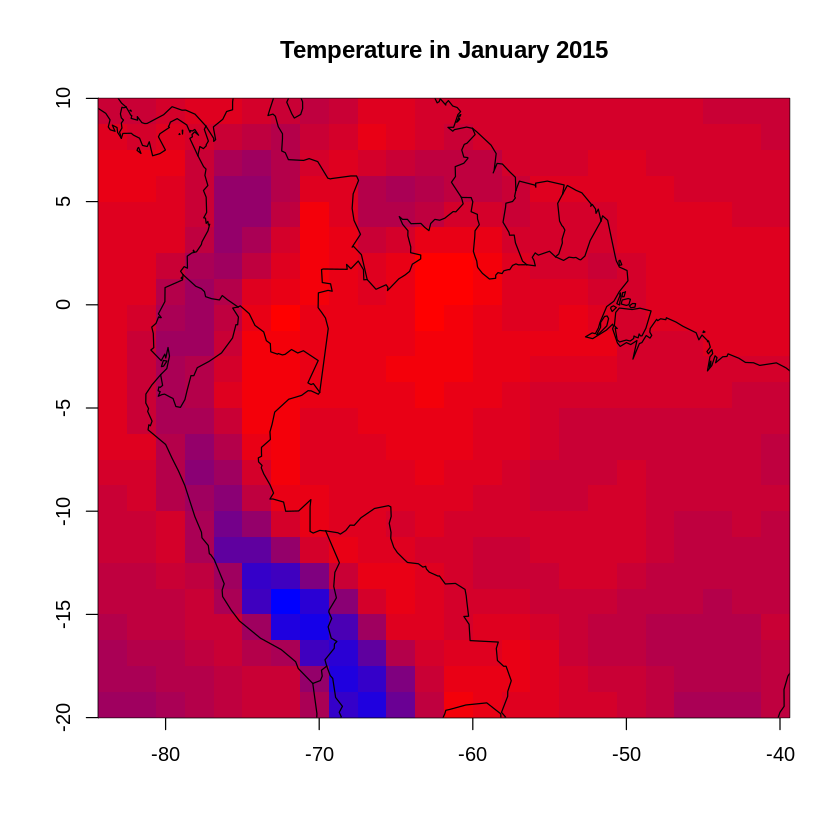

In [ ]:
image(lon,lat,temp_c[,,1], zlim=c(6,31), main='Temperature in January 2015', col=blueToRed(25), xlab='', ylab='')
map('world', add=T)

The use of `zlim` tells R to spread the 25 colours from the `blueToRed(25)` output evenly across 6 to 31 degrees (which I have made a 25 degree difference so we have 1 colour per degree).

We can add a colour bar below using the code below. Note that this is quite complicated and it is not expected that you fully understand this code block, just realise where each section comes from. The comments on each line go someway to help with this.

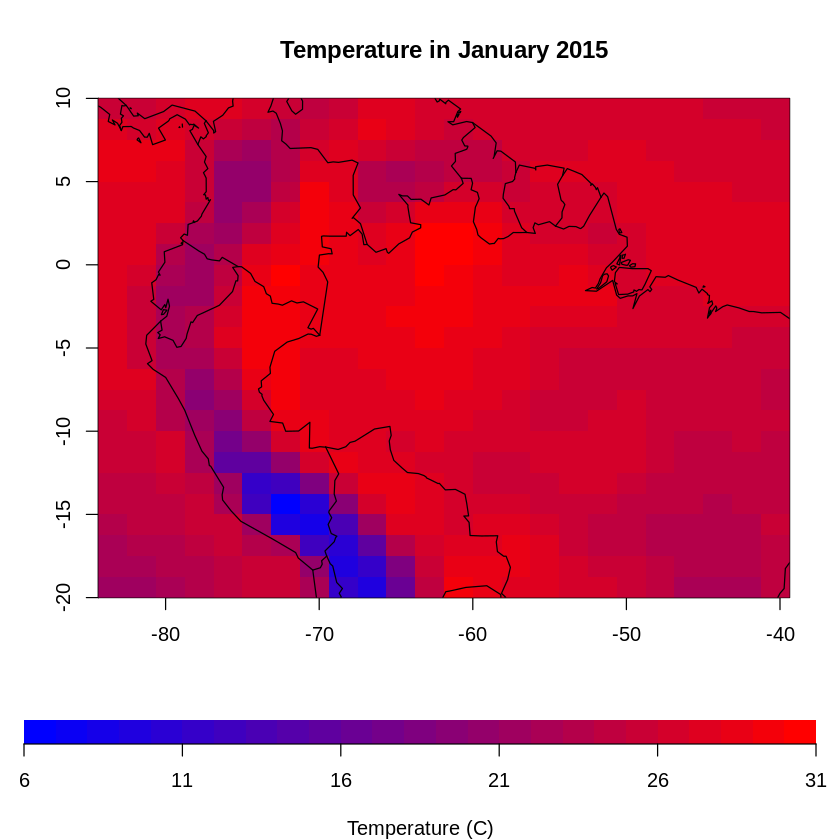

In [ ]:
layout(matrix(c(1,2), ncol=1), heights=c(6,1)) #sets up a plot with two panels (2 rows and 1 column)
image(lon,lat,temp_c[,,1], zlim=c(6,31), main='Temperature in January 2015', col=blueToRed(25), xlab='', ylab='')
map('world', add=T)

par(mar=c(4,1,0,1)) #set up margins around the colour bar
image(1:25,1,matrix(1:25), col=blueToRed(25), axes=F, xlab='', ylab='') #use image to make the colour bar
axis(1, at=seq(0.5,26.5,5), labels=seq(6,31,5), tick=TRUE, line=0) #add an axis to it
mtext('Temperature (C)',1,line=3) #and label at the bottom



**Use the code block below to make a map like above for carbon mass in vegetation for July of the same year. You will probably want a more useful colour palette but use the code block above and change what is needed in it.**

#Regression Modelling

We will now look at running a simple linear regression on the data. We will look at the relationship between the amount of carbon vegetation, and temperature and precipitation.

This regression will look spatially, using an average of each variable over the first 5 years. First, we create arrays to store the values in, and then use a nested for loop to loop through each row and column and calculate the mean of the first 60 values (which is the first 5 years). The `image()` at the end is a nice test to check things are as expected.

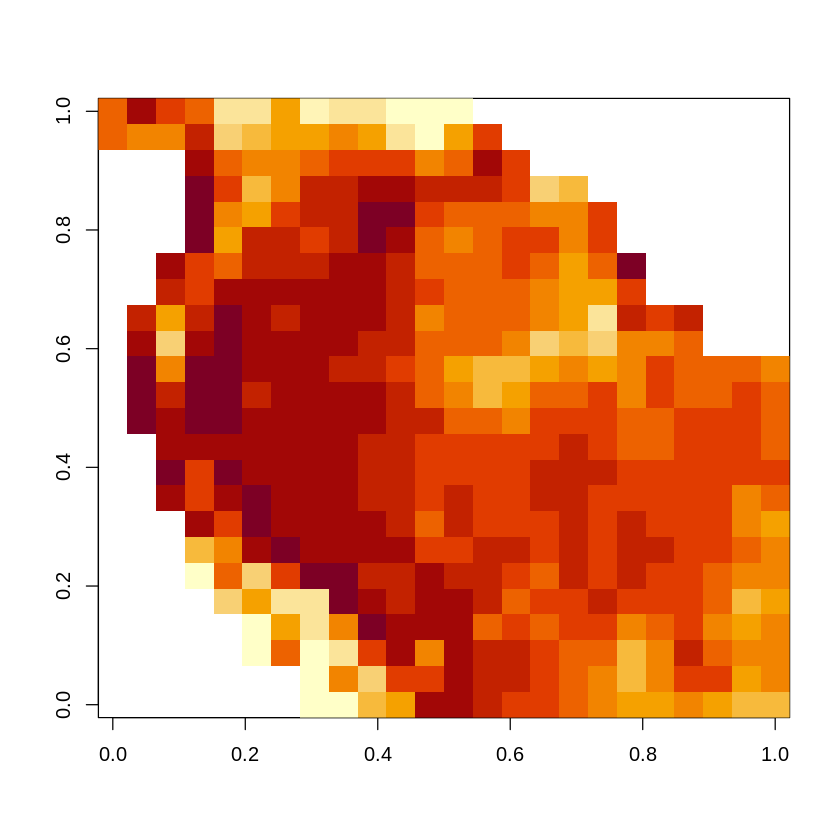

In [ ]:
temp_start5 <- array(NA, dim=c(length(lon),length(lat)))
precip_start5 <- array(NA, dim=c(length(lon),length(lat)))
cveg_start5 <- array(NA, dim=c(length(lon),length(lat)))

for (i in 1:length(lon)) {
  for (j in 1:length(lat)) {
    temp_start5[i,j] <- mean(temp_c[i,j,1:60])
    precip_start5[i,j] <- mean(precip_mon[i,j,1:60])
    cveg_start5[i,j] <- mean(cveg[i,j,1:60])
  }
}

image(cveg_start5)

To run the model, as we learned in the basics of R section, we simply use the `lm()` function and check it with `summary()`. Note that R does not like 2D arrays being put into the `lm()` function as we can fix this with the `as.vector()` function that makes these 2D objects, 1 dimensional:

In [ ]:
mod <- lm(as.vector(cveg_start5) ~ as.vector(temp_start5) + as.vector(precip_start5))
summary(mod)


Call:
lm(formula = as.vector(cveg_start5) ~ as.vector(temp_start5) + 
    as.vector(precip_start5))

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2696  -1.0603   0.5566   1.8433   6.6855 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.337144   1.031372  -0.327    0.744    
as.vector(temp_start5)    0.299851   0.035809   8.374 7.38e-16 ***
as.vector(precip_start5)  0.036125   0.002024  17.850  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.037 on 444 degrees of freedom
  (129 observations deleted due to missingness)
Multiple R-squared:  0.4483,	Adjusted R-squared:  0.4458 
F-statistic: 180.4 on 2 and 444 DF,  p-value: < 2.2e-16


This looks like a fairly decent model, temperature and precipitation both have significantly positive coefficients, meaning they contribute to carbon vegetation. Our R^2 value is reasonable too. There is likely to be a better model out there but this workshop focuses on the coding. **Use the code block below to construct a linear regression model for the last 5 years of the data. What changes do you notice and why might this be?**